In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [4]:
start=dt.datetime(2010,4,1)
end=dt.datetime(2020,4,1)
#Taking Microsoft stock data and its Index i.e. NASDAQ data
assets = ['MSFT', '^IXIC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, 'yahoo', start , end)['Adj Close']

In [5]:
pf_data.head()

,MSFT,^IXIC
Date,,
2010-03-31,23.098850,2397.959961
2010-04-01,22.996336,2402.580078
2010-04-05,23.083084,2429.530029
2010-04-06,23.122520,2436.810059
2010-04-07,23.146170,2431.159912


In [6]:
pf_data.tail()

,MSFT,^IXIC
Date,,
2020-03-26,156.110001,7797.540039
2020-03-27,149.699997,7502.379883
2020-03-30,160.229996,7774.149902
2020-03-31,157.710007,7700.100098
2020-04-01,152.110001,7360.580078


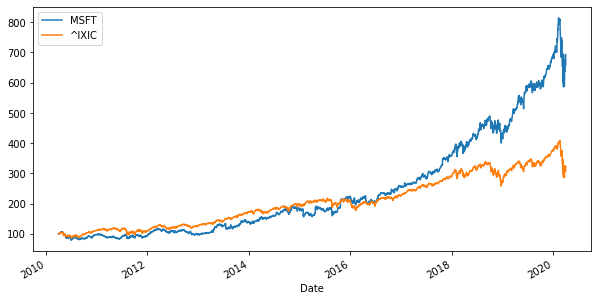

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

# Obtaining the Effecient Frontier

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [9]:
log_returns.mean() * 250

MSFT     0.187135
^IXIC    0.111350
dtype: float64

In [10]:
log_returns.cov() * 250

,MSFT,^IXIC
MSFT,0.062164,0.037025
^IXIC,0.037025,0.036364


In [11]:
log_returns.corr()

,MSFT,^IXIC
MSFT,1.000000,0.778742
^IXIC,0.778742,1.000000


Considering 1000 different combinations of the 2 assests. The efficient combination is determined by comparing all the combinations. 

In [27]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [28]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.133414,0.197037
1,0.162912,0.220442
2,0.158983,0.216483
3,0.129055,0.194958
4,0.140075,0.200952


In [29]:
portfolios.tail()

,Return,Volatility
995,0.185203,0.246776
996,0.133182,0.196917
997,0.171116,0.229414
998,0.158981,0.216481
999,0.160411,0.217896


Text(0, 0.5, 'Expected Return')

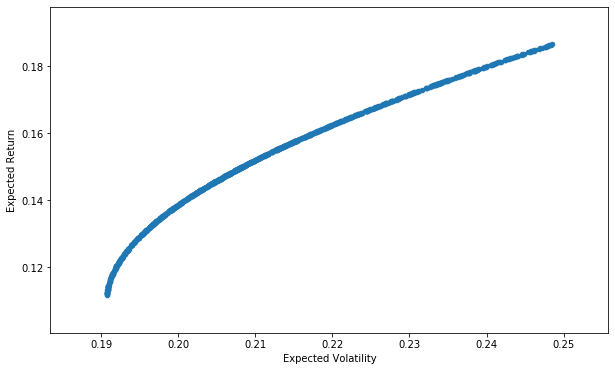

In [30]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')